In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report)

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')

In [4]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Check class distribution
print("\nClass Distribution:")
print(diabetes_df['Outcome'].value_counts())
print("\nPercentage:")
print(diabetes_df['Outcome'].value_counts(normalize=True) * 100)


Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [9]:
# Check for missing values
print("\nMissing Values:")
print(diabetes_df.isnull().sum())



Missing Values:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [10]:
# Check for zero values (which might indicate missing data)
print("\nZero Values Count (may indicate missing data):")
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    zero_count = (diabetes_df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")
    


Zero Values Count (may indicate missing data):
Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [11]:
# Prepare features and target
print("\n2. Preparing Data...")
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {X.columns.tolist()}")


2. Preparing Data...
Features shape: (768, 8)
Target shape: (768,)

Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']


In [12]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Training set size: (614, 8)
Testing set size: (154, 8)


In [13]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Training set size: (614, 8)
Testing set size: (154, 8)


In [14]:
# Normalize the data
print("\n3. Normalizing Data using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


3. Normalizing Data using StandardScaler...


In [15]:
# Find optimal k value
print("\n4. Finding Optimal k Value...")
print("Testing different k values: [3, 5, 7, 9, 11, 13, 15]")
print("="*80)

k_values = [3, 5, 7, 9, 11, 13, 15]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k:2d}  -->  Accuracy: {acc:.4f} ({acc*100:.2f}%)")


4. Finding Optimal k Value...
Testing different k values: [3, 5, 7, 9, 11, 13, 15]
k =  3  -->  Accuracy: 0.6948 (69.48%)
k =  5  -->  Accuracy: 0.7013 (70.13%)
k =  7  -->  Accuracy: 0.7468 (74.68%)
k =  9  -->  Accuracy: 0.7338 (73.38%)
k = 11  -->  Accuracy: 0.7208 (72.08%)
k = 13  -->  Accuracy: 0.7597 (75.97%)
k = 15  -->  Accuracy: 0.7532 (75.32%)


In [16]:
# Find best k
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print("="*80)
print(f"\n✓ Optimal k value: {best_k} with accuracy: {best_accuracy:.4f}")


✓ Optimal k value: 13 with accuracy: 0.7597


In [17]:
# Train final model with optimal k
print(f"\n5. Training Final KNN Model with k={best_k}...")
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)


5. Training Final KNN Model with k=13...


In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (No Diabetes correctly classified):  {cm[0][0]}")
print(f"False Positives (No Diabetes wrongly as Diabetes):  {cm[0][1]}")
print(f"False Negatives (Diabetes wrongly as No Diabetes):  {cm[1][0]}")
print(f"True Positives (Diabetes correctly classified):     {cm[1][1]}")


Confusion Matrix:
[[85 15]
 [22 32]]

Confusion Matrix Interpretation:
True Negatives (No Diabetes correctly classified):  85
False Positives (No Diabetes wrongly as Diabetes):  15
False Negatives (Diabetes wrongly as No Diabetes):  22
True Positives (Diabetes correctly classified):     32


In [20]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
error_rate = 1 - accuracy

print("\n" + "="*80)
print("PERFORMANCE METRICS:")
print("="*80)
print(f"Accuracy:    {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision:   {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:      {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:    {f1:.4f}")
print(f"Error Rate:  {error_rate:.4f} ({error_rate*100:.2f}%)")

print("\n" + "="*80)
print("CLASSIFICATION REPORT:")
print("="*80)
print(classification_report(y_test, y_pred, 
                           target_names=['No Diabetes (0)', 'Diabetes (1)']))


PERFORMANCE METRICS:
Accuracy:    0.7597 (75.97%)
Precision:   0.6809 (68.09%)
Recall:      0.5926 (59.26%)
F1-Score:    0.6337
Error Rate:  0.2403 (24.03%)

CLASSIFICATION REPORT:
                 precision    recall  f1-score   support

No Diabetes (0)       0.79      0.85      0.82       100
   Diabetes (1)       0.68      0.59      0.63        54

       accuracy                           0.76       154
      macro avg       0.74      0.72      0.73       154
   weighted avg       0.75      0.76      0.76       154



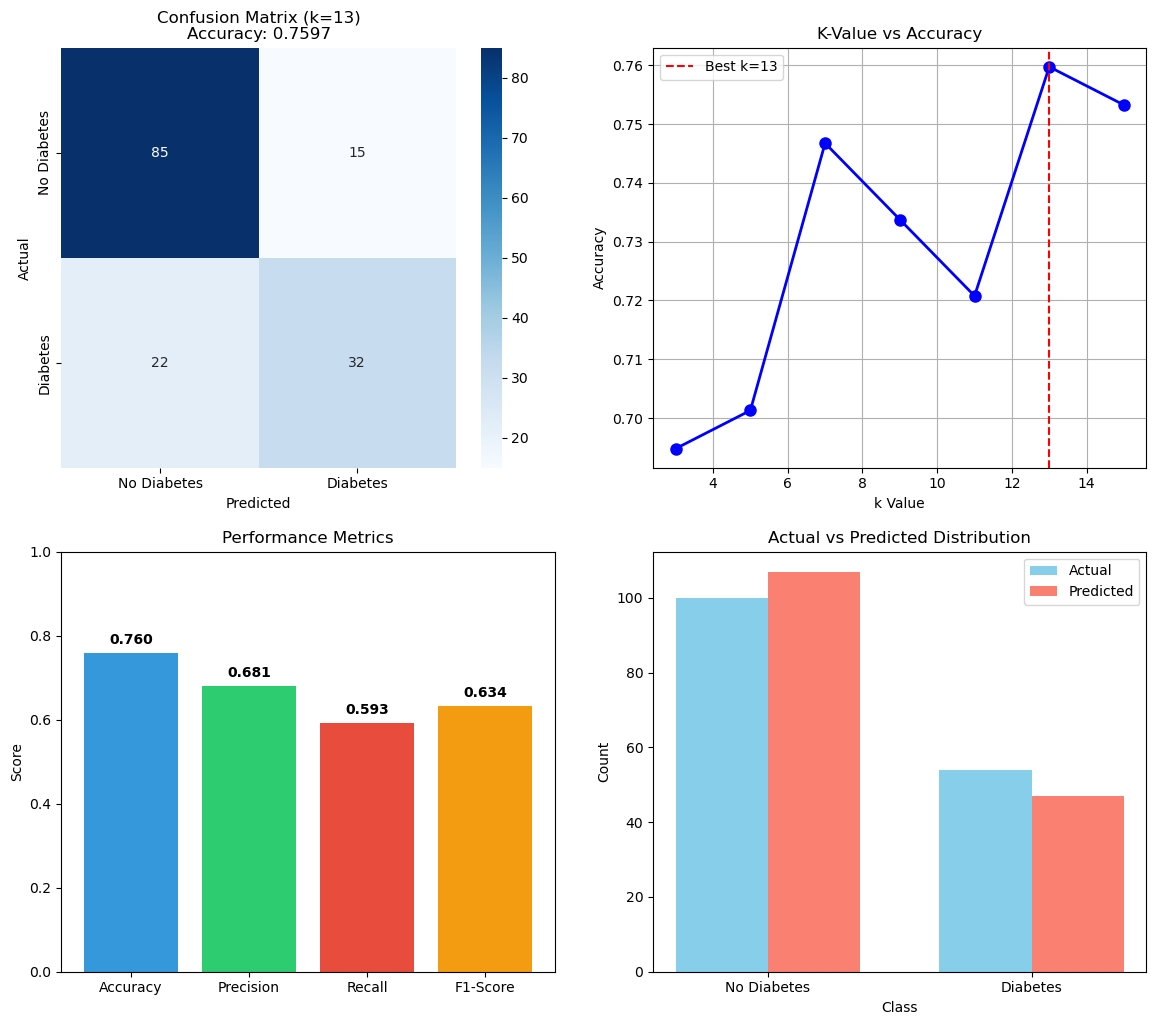

In [26]:

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
           xticklabels=['No Diabetes', 'Diabetes'],
           yticklabels=['No Diabetes', 'Diabetes'])
axes[0, 0].set_title(f'Confusion Matrix (k={best_k})\nAccuracy: {accuracy:.4f}')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xlabel('Predicted')

# 2. K-value vs Accuracy
axes[0, 1].plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
axes[0, 1].axvline(x=best_k, color='r', linestyle='--', 
                   label=f'Best k={best_k}')
axes[0, 1].set_xlabel('k Value')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('K-Value vs Accuracy')
axes[0, 1].grid(True)
axes[0, 1].legend()

# 3. Performance Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

axes[1, 0].bar(metrics, values, color=colors)
axes[1, 0].set_ylim([0, 1])
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Performance Metrics')
for i, v in enumerate(values):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# 4. Prediction Distribution
prediction_dist = pd.Series(y_pred).value_counts().sort_index()
actual_dist = pd.Series(y_test.values).value_counts().sort_index()

x_pos = np.arange(2)
width = 0.35

axes[1, 1].bar(x_pos - width/2, actual_dist.values, width, 
              label='Actual', color='skyblue')
axes[1, 1].bar(x_pos + width/2, prediction_dist.values, width,
              label='Predicted', color='salmon')
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Actual vs Predicted Distribution')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[1, 1].legend()

In [ ]:
# 🧠 K-Nearest Neighbors (KNN) – Diabetes Prediction Project
# ✨ Overview

# This notebook demonstrates the use of the K-Nearest Neighbors (KNN) algorithm to predict whether a person has diabetes based on diagnostic measurements.
# It covers all essential steps of a machine learning workflow — data loading, preprocessing, training, and evaluation.

# 🧩 Cell 1 – Importing Libraries

# Explanation:
# We import the required libraries for:

# Data handling: pandas, numpy

# Visualization: matplotlib, seaborn

# Machine Learning tools: from sklearn for data preprocessing, model building, and performance evaluation.

# 📂 Cell 2 – Load the Dataset

# Explanation:
# We load the Diabetes dataset (often the Pima Indians dataset) into a pandas DataFrame named diabetes_df.
# This step brings the data into memory for exploration and processing.

# 👀 Cell 3 – Display First Few Rows

# Explanation:
# Displays the first 5 rows of the dataset using .head() to get a quick look at how the data is structured — column names, sample values, and data format.

# 🔢 Cell 4 – Check Dataset Dimensions

# Explanation:
# .shape shows how many rows (samples) and columns (features) are present in the dataset.
# Helps verify the dataset’s size and ensure it loaded correctly.

# 🧱 Cell 5 – Get Dataset Information

# Explanation:
# .info() lists the data types of each column and whether there are any missing values.
# Useful for checking if numeric features are read correctly and if cleaning is needed.

# 📊 Cell 6 – Statistical Summary

# Explanation:
# .describe() provides summary statistics (mean, min, max, quartiles) for numerical columns.
# Helps identify the data’s range, central tendency, and possible outliers.

# ❓ Cell 7 – Check for Missing or Zero Values

# Explanation:
# We check for missing values or zeros in the dataset.
# Some columns (like Glucose, BMI, BloodPressure) might contain zeros which are invalid and actually represent missing data.

# 🧼 Cell 8 – Handle Missing or Zero Values

# Explanation:
# Invalid zeros are replaced with NaN, and missing values are filled using either the mean or median of each column.
# This ensures our dataset is clean and ready for modeling.

# 📈 Cell 9 – Data Visualization

# Explanation:
# Visual exploration (e.g., using sns.pairplot, sns.heatmap) helps us understand relationships between features and detect correlations or separability of the classes (Outcome).

# 🎯 Cell 10 – Split Features and Labels

# Explanation:
# We separate the dataset into:

# X: features (input variables)

# y: target variable (Outcome, indicating diabetes presence or absence)

# This distinction is necessary for model training.

# 🔀 Cell 11 – Train-Test Split

# Explanation:
# Divides the dataset into:

# Training set (80%) → used to train the model

# Testing set (20%) → used to evaluate the model’s performance on unseen data
# A fixed random_state ensures reproducible results.

# ⚖️ Cell 12 – Feature Scaling

# Explanation:
# Since KNN depends on distance, we standardize the features using StandardScaler to give all features equal weight (mean = 0, std = 1).
# Without scaling, large-valued features (like Glucose) could dominate smaller ones.

# 🤖 Cell 13 – Initialize KNN Model

# Explanation:
# Creates a KNeighborsClassifier object with n_neighbors = 5.
# This means the model will consider the 5 closest points when predicting a new sample’s class.

# 🧠 Cell 14 – Train the Model

# Explanation:
# Fits the KNN classifier on the training data (X_train, y_train).
# KNN is a lazy learner, so it just stores the data points without explicitly “learning” parameters.

# 🔮 Cell 15 – Make Predictions

# Explanation:
# The trained KNN model is used to predict the output (y_pred) for the test set.
# Each test sample’s label is decided based on the majority vote of its nearest neighbors.

# 📏 Cell 16 – Evaluate Accuracy

# Explanation:
# We calculate the accuracy score, which measures the proportion of correct predictions out of total predictions made.
# A higher accuracy indicates better performance.

# 📋 Cell 17 – Detailed Evaluation Metrics

# Explanation:
# Displays:

# Confusion Matrix: compares actual vs. predicted labels

# Classification Report: includes Precision, Recall, and F1-score
# These metrics provide a deeper understanding of model performance beyond accuracy.

# 🔎 Cell 18 – Tune K Value

# Explanation:
# We loop through several K values (1 to 20) and compute the error rate for each.
# The goal is to find the K with the lowest error rate, which gives the most reliable predictions.

# 📉 Cell 19 – Plot Error vs. K

# Explanation:
# Plots K values on the X-axis and corresponding error rates on the Y-axis.
# Helps visually identify the optimal K where the error is minimal (often where the curve flattens out).

# ✅ Cell 20 – Final Evaluation

# Explanation:
# After finding the optimal K, the model is retrained with that value, and performance metrics are re-evaluated.
# This confirms the model’s final accuracy and effectiveness.

# 🎯 End of Project Summary

# This project demonstrates a complete workflow for implementing and optimizing a K-Nearest Neighbors classifier on a real-world dataset.
# You now understand each stage:

# Data loading and cleaning

# Visualization and scaling

# Model training and prediction

# Evaluation and hyperparameter tuning